# Дипломная работа по курсу «Python для анализа данных»

Студент: Попов Илья Олегович, PYDA - 8

In [34]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import io
import requests
import statistics
import ssl
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

# Задание №1
Загрузить файл hr.csv (можно найти во сложении к заданию)

In [35]:
data = pd.read_csv('HR.csv')
data = data.reset_index()
data.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
data.columns=['id_emp', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 
                     'promotion_last_5years', 'sales', 'salary']
data.head() 

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание №2
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [37]:
# Вариант №1
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id_emp,14999.0,7499.000000,4329.982679,0.00,3749.50,7499.00,11248.50,14998.0
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


# Мода
Мода - значение, которое наиболее часто встречается в выборке

In [38]:
mode = data.mode().T.head(10)
mode[[0,1]]

,0,1
id_emp,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN


Сделаем моду, по количеству проектов в работе у каждого сотрудника

In [39]:
# Создаём пустой словарь, в котором будем считать количество проектов, которые встречаются
number_pr = data['number_project']
dict_ = {}

for p in number_pr:
    if p not in dict_:
        dict_[p] = 1
    else:
        dict_[p] +=1
dict_

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума

max_pr = 0
mode_project = None
for num,count_ in dict_.items():
    if max_pr < count_:
        max_pr = count_
        mode_project = num
print('Значение моды: ', mode_project, 'Количество встречаемости: ', max_pr)


Значение моды:  4 Количество встречаемости:  4365


In [40]:
# Вариант №2: Сделаем функцию для расчета показателей
def gen_stats(series):
    print('Среднее значение:', series.mean())
    print('Мода:', int(stats.mode(series)[0]))
    print('Минимум:', series.min())
    print('Максимум:', series.max())
    print('Стандартное отклонение:', series.std())
    return

In [41]:
for i in range(7):
    print(f'{data.iloc[:, i].name}:')
    gen_stats(data.iloc[:, i])
    print()

id_emp:
Среднее значение: 7499.0
Мода: 0
Минимум: 0
Максимум: 14998
Стандартное отклонение: 4329.98267894919

satisfaction_level:
Среднее значение: 0.6128335222348166
Мода: 0
Минимум: 0.09
Максимум: 1.0
Стандартное отклонение: 0.2486306510611418

last_evaluation:
Среднее значение: 0.7161017401159978
Мода: 0
Минимум: 0.36
Максимум: 1.0
Стандартное отклонение: 0.17116911062327592

number_project:
Среднее значение: 3.80305353690246
Мода: 4
Минимум: 2
Максимум: 7
Стандартное отклонение: 1.2325923553183857

average_montly_hours:
Среднее значение: 201.0503366891126
Мода: 135
Минимум: 96
Максимум: 310
Стандартное отклонение: 49.943099371284305

time_spend_company:
Среднее значение: 3.498233215547703
Мода: 3
Минимум: 2
Максимум: 10
Стандартное отклонение: 1.4601362305354546

work_accident:
Среднее значение: 0.1446096406427095
Мода: 0
Минимум: 0
Максимум: 1
Стандартное отклонение: 0.3517185523801279



### Визуализируем данные

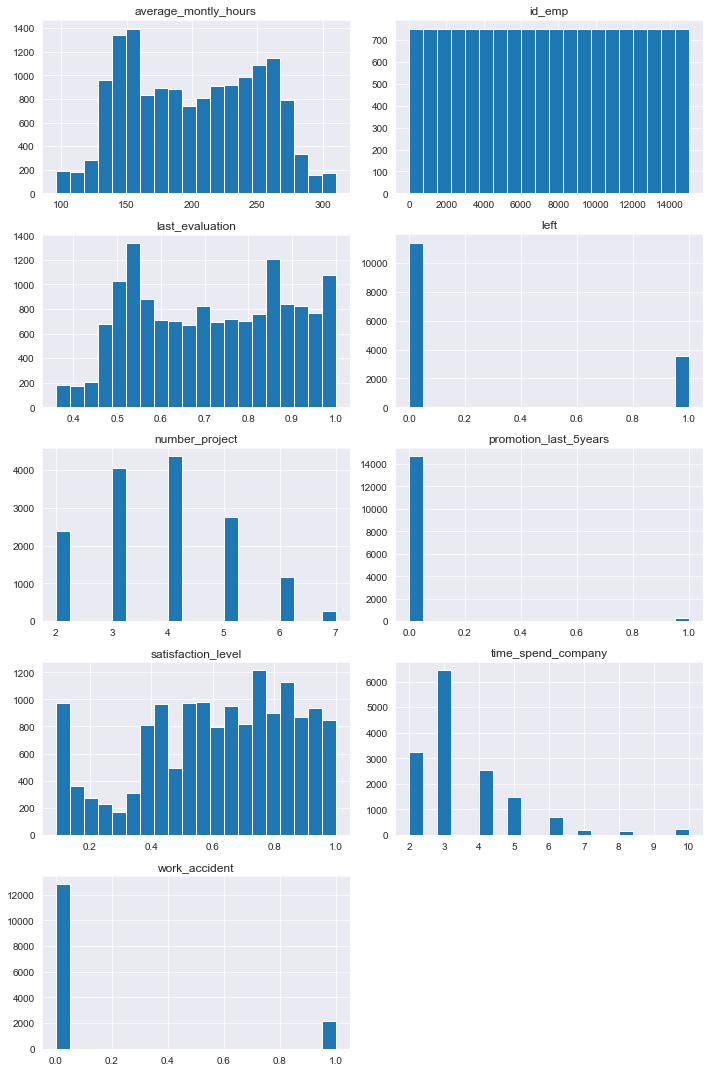

In [42]:
data.select_dtypes('number').hist(layout = (5,2), figsize = (10,15), bins = 20)
plt.tight_layout()

# Задание №3
Рассчитать и визуализировать корреляционную матрицу для переменных

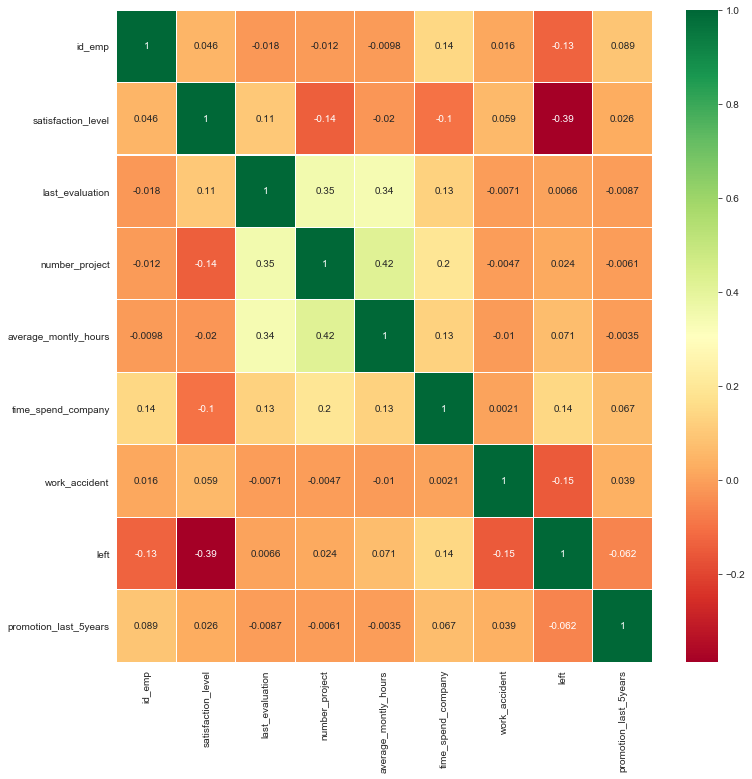

In [43]:
# Уберем все пустые значения
data.dropna()

# Корреляционная матрица
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdYlGn',linewidths = 0.2) #data.corr()-->матрица корреляций

# gcf() - получение текущей фигуры
fig=plt.gcf()

# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# Задание №4
Визуализировать несколько взаимосвязей между переменными

### Как сильно загрузка по проектам влияет на удовлетворённость работников?

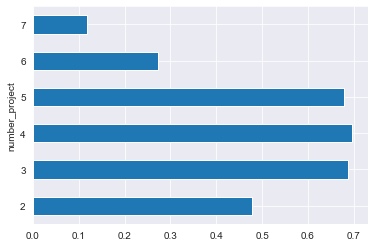

In [47]:
condition_work = data.groupby('number_project').mean()['satisfaction_level']
condition_work.plot(kind = 'barh')
plt.show()

### Вывод:
Оптимальный уровень загрузки для сотрудника - 3-5 проектов, при большем или меньшем значении сотрудники теряют уровень удовлетворенности

### Влияет ли высокая загрузка по проектам на рабочие инциденты из-за дикой усталости?

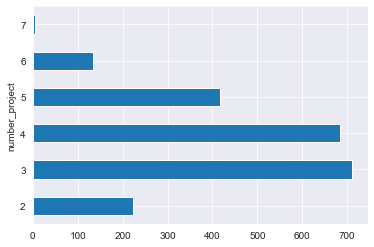

In [48]:
reason_work_accident = data[data['work_accident'] > 0].groupby('number_project').count()['work_accident']
reason_work_accident.plot(kind = 'barh')
plt.show()

### Вывод:
Высокая загрузка не влияет на количество рабочих инцидентов

# Задание №5
С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [183]:
# Проверим гипотезу: У людей с происшествиями на работе и без них уровень удовлетворенности равный
no_accident_satlevel = data[data['work_accident'] == 0]['satisfaction_level']
accident_satlevel = data[data['work_accident'] == 1]['satisfaction_level']
stats.ttest_ind(no_accident_satlevel, accident_satlevel)
# Так как pvalue=6.279179915219481e-13, то есть крайне низкий, гипотезу можно считаь опровергнутой, 
# Уровень удовлетворенности разный 

Ttest_indResult(statistic=-7.200610639695171, pvalue=6.279179915219481e-13)

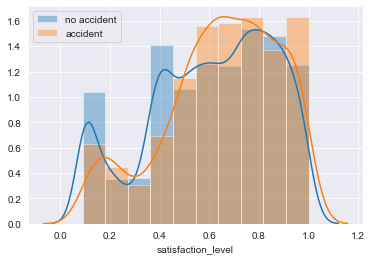

In [184]:
sns.distplot(no_accident_satlevel, 10)
sns.distplot(accident_satlevel, 10)
plt.legend(['no accident', 'accident'])
plt.show()

In [185]:
# Проверим гипотезу: Что оценка не влияет на решение человека уволиться

leftstaff = data[data['left'] == 1]['last_evaluation']
workstaff = data[data['left'] == 0]['last_evaluation']

ttest_ind(leftstaff, workstaff)
# Так как pvalue=0.4212701963735056, значительно выше 0,05, то выборки можно считать похожими, а гипотезу, соответственно,подтверждённой

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [186]:
# Другим способом проверим данную гипотезу
from scipy.stats import spearmanr

stat, p = spearmanr(data['last_evaluation'], data['left'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Факт увольнения не зависит от оценки сотрудника')
else:
    print('Факт увольнения зависит от оценки сотрудника')

stat=-0.002, p=0.765
Факт увольнения не зависит от оценки сотрудника


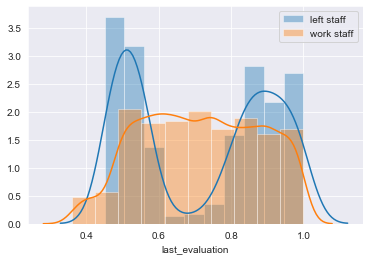

In [187]:
sns.distplot(leftstaff, 10)
sns.distplot(workstaff, 10)
plt.legend(['left staff', 'work staff'])
plt.show()

# Задание №6
Рассчитать сколько работников работает в каждом департаменте

In [188]:
# Все сотрудники
all_emp = data['sales'].value_counts()
all_emp.head(10)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [189]:
# Только работающие сотрудники
current_emp = data[data['left'] == 0]['sales'].value_counts()
current_emp.head(10)

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

In [190]:
# Только уволившиеся сотрудники
fired_emp = data[data['left'] == 1]['sales'].value_counts()
fired_emp.head(10)

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

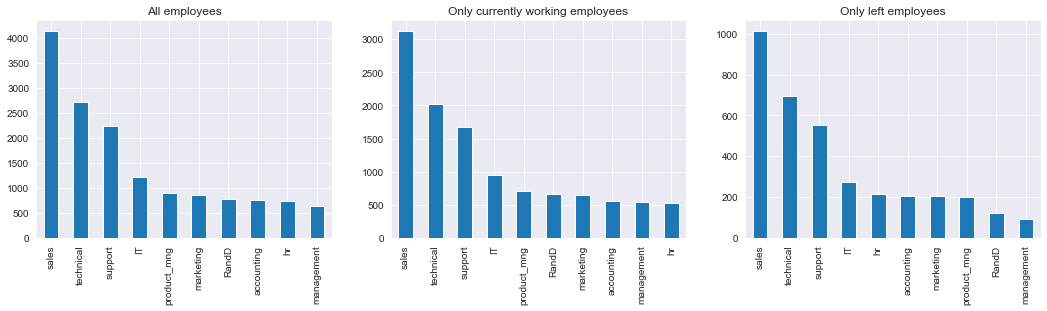

In [191]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax = axes.flatten()

# Все
all_emp.plot(kind="bar", ax=ax[0])
ax[0].set_title("All employees")

# Работающие
current_emp.plot(kind="bar", ax=ax[1])
ax[1].set_title("Only currently working employees")

# Уволившиеся
fired_emp.plot(kind="bar", ax=ax[2])
ax[2].set_title("Only left employees")

plt.show()

# Задание №7
Показать распределение сотрудников по зарплатам

In [192]:
# Все сотрудники
employees_all_salary = data.groupby('salary').count().loc[['low','medium','high']]['sales']
# Только работающие сотрудники
employees_cur_salary = data[data['left'] == 0].groupby('salary').count().loc[['low','medium','high']]['sales']
# Только уволившиеся сотрудники
employees_left_salary = data[data['left'] == 1].groupby('salary').count().loc[['low','medium','high']]['sales']

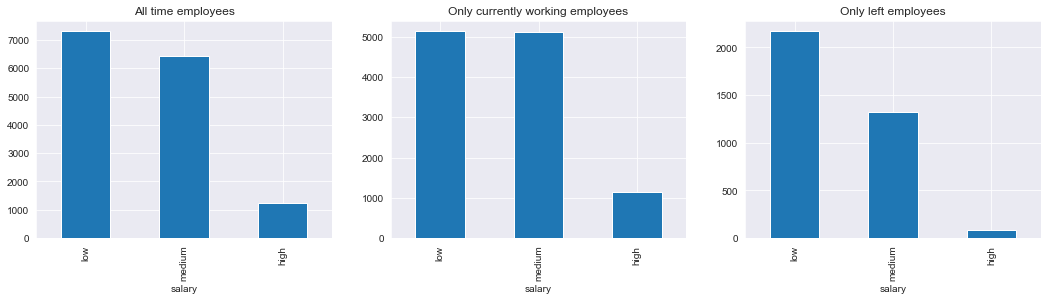

In [193]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax = axes.flatten()

# Все
employees_all_salary.plot(kind = "bar", ax = ax[0])
ax[0].set_title("All time employees")

# Работающие
employees_cur_salary.plot(kind = "bar", ax = ax[1])
ax[1].set_title("Only currently working employees")

# Уволившиеся
employees_left_salary.plot(kind = "bar", ax = ax[2])
ax[2].set_title("Only left employees")

plt.show()

# Задание №8
Показать распределение сотрудников по зарплатам совместно с департаментами

In [194]:
# Вариант №1 через группировку, но он не очень удобный:
# dep_salary = data.groupby(['sales', 'salary'])[['left']].count()

# Вариант №2 через сводную таблицу, самый читаемый и понятный:
sorted_dep_salary = (pd.pivot_table(
                                data, 
                                columns = 'salary', 
                                index = 'sales', 
                                values = 'average_montly_hours', 
                                aggfunc ='count'
    
                               ).sort_values(by='sales', ascending=False)
               )
sorted_dep_salary.head(10)

salary,high,low,medium
sales,,,
technical,201,1372,1147
support,141,1146,942
sales,269,2099,1772
product_mng,68,451,383
marketing,80,402,376
management,225,180,225
hr,45,335,359
accounting,74,358,335
RandD,51,364,372


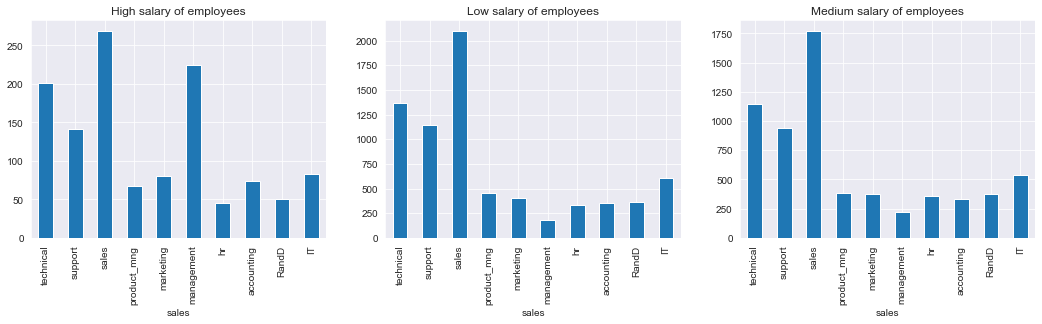

In [195]:
# Готовим данные для графика
line_1 = sorted_dep_salary['high']
line_2 = sorted_dep_salary['low']
line_3 = sorted_dep_salary['medium']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax = axes.flatten()

# Высокая заработная плата в разрезе по департаментам
line_1.plot(kind = 'bar', ax = ax[0])
ax[0].set_title('High salary of employees')

# Низкая заработная плата в разрезе по департаментам
line_2.plot(kind ='bar', ax = ax[1])
ax[1].set_title("Low salary of employees")

# Средняя заработная плата в разрезе по департаментам
line_3.plot(kind ='bar', ax = ax[2])
ax[2].set_title('Medium salary of employees')

plt.show()

# Задание №9
Сколько сотрудников покинули компанию

In [196]:
print(f"Количество сотрудников, которые покинули компанию в разрезе по департаментам: \n {data[data['left'] == 1]['sales'].value_counts().head(10)}")

Количество сотрудников, которые покинули компанию в разрезе по департаментам: 
 sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64


In [197]:
print(f"Общее количество сотрудников, которые покинули компанию: {data[data['left'] == 1]['left'].count()}")

Общее количество сотрудников, которые покинули компанию: 3571


# Задание №10
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Сотрудники с каким уровнем удовлетворенности увольняются чаще?

In [198]:
satisfaction_salary = pd.pivot_table(
    data, 
    values = 'satisfaction_level', 
    index = 'sales', 
    columns = 'left', 
    aggfunc = 'count',
    fill_value = 0
)

#Сортируем по убыванию для аналитики 
satisfaction_salary = satisfaction_salary.sort_values('sales', ascending = False)
satisfaction_salary.head(10)

left,0,1
sales,,
technical,2023,697
support,1674,555
sales,3126,1014
product_mng,704,198
marketing,655,203
management,539,91
hr,524,215
accounting,563,204
RandD,666,121


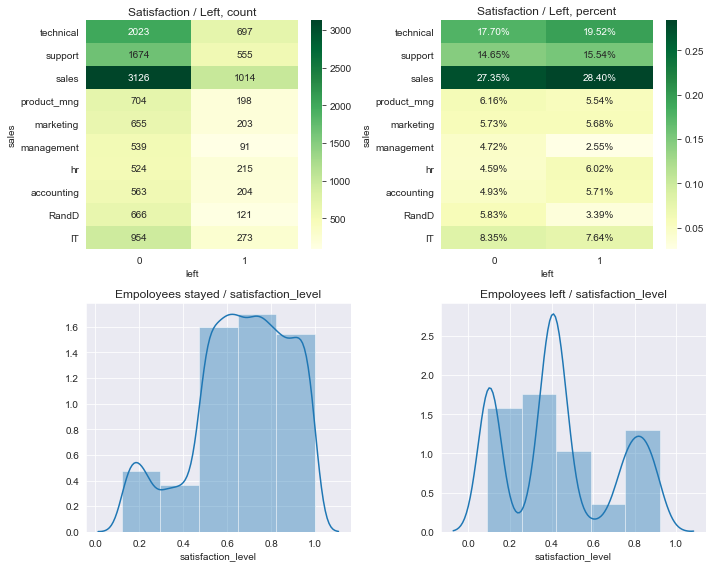

In [200]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax = axes.flatten()

# Кол-во и % от группы
sns.heatmap(satisfaction_salary, annot = True, fmt = '1.0f', ax = ax[0], cmap = 'YlGn')
sns.heatmap(satisfaction_salary.apply(lambda x:x/sum(x), axis = 0), annot = True, fmt = '0.2%', cmap = 'YlGn', ax = ax[1])
ax[0].set_title('Satisfaction / Left, count')
ax[1].set_title('Satisfaction / Left, percent')

# Распределение - работающие и уволившиеся
sns.distplot( a = data['satisfaction_level'][data['left'] == False], hist=True, kde = True, ax = ax[2], bins = 5)
sns.distplot( a = data['satisfaction_level'][data['left'] == True], hist=True, kde = True, ax = ax[3], bins = 5)
ax[2].set_title('Empoloyees stayed / satisfaction_level')
ax[3].set_title('Empoloyees left / satisfaction_level')

plt.tight_layout()

### Вывод:
Визуально видно, что в группе уволившихся сотрудников уровень удовлетворенности ниже.

### Уволившихся сотрудников реже повышали в должности?

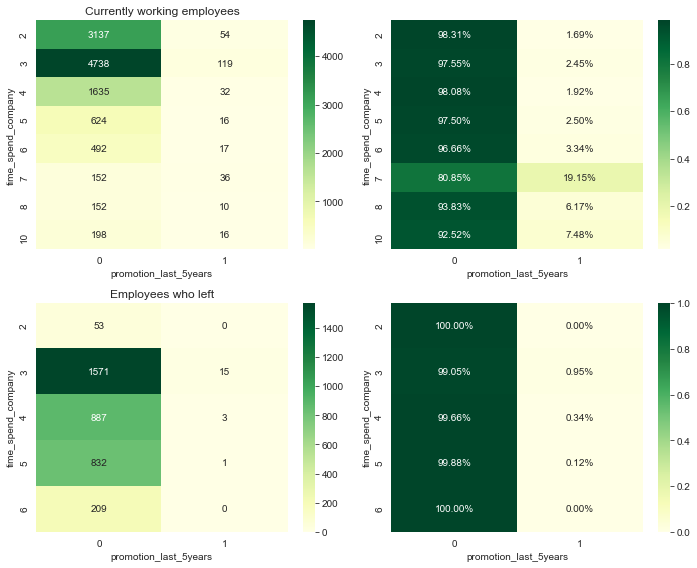

In [166]:
# Кол-во повышенных и не повышенных сотрудников среди работающих
promotion_years_cur = (
                    pd.pivot_table(
                            data[data['left'] == 0], fill_value = 0, 
                            columns ='promotion_last_5years', index = 'time_spend_company', 
                            values = 'satisfaction_level', aggfunc = 'count'
                        )
                    )

# Кол-во повышенных и не повышенных сотрудников среди уволившихся
promotion_years_left = (
                    pd.pivot_table(
                            data[data['left'] == 1], fill_value=0, 
                            columns = 'promotion_last_5years', index = 'time_spend_company', 
                            values = 'satisfaction_level', aggfunc = 'count'
                        )
                    )

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
ax = axes.flatten()

# Работающие
sns.heatmap(promotion_years_cur, annot = True, fmt = '1.0f', ax = ax[0], cmap = 'YlGn')
sns.heatmap(promotion_years_cur.apply(lambda x:x/sum(x), axis = 1), annot = True, fmt = '0.2%', cmap = 'YlGn', ax = ax[1])
ax[0].set_title('Currently working employees')

# Уволившиеся
sns.heatmap(promotion_years_left, annot = True, fmt = '1.0f', ax = ax[2], cmap = 'YlGn')
sns.heatmap(promotion_years_left.apply(lambda x:x/sum(x), axis = 1), annot = True, fmt = '0.2%', cmap = 'YlGn', ax = ax[3])
ax[2].set_title('Employees who left')

plt.tight_layout()
plt.show()

### Вывод:
Несмотря на то, что общее количество повышенных в должности сотрудников не слишком высоко, видна разница в группе работающих и уволившихся.
При одинаковом количестве проведенных в компании лет, в группе уволившихся количество повышенных в дожности сотрудников сильно ниже.

In [218]:
ttest = stats.ttest_ind(data[data['left'] == 0]['promotion_last_5years'], data[data['left'] == 1]['promotion_last_5years'])
print(ttest)
print(f'P = {ttest.pvalue:0.5f}')

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)
P = 0.00000


### Применим распределение Манна-Уитни.

In [217]:
mannwhitneyu = stats.mannwhitneyu(data[data['left'] == 0]['promotion_last_5years'], data[data['left'] == 1]['promotion_last_5years'])
print(mannwhitneyu)
print(f"P = {mannwhitneyu.pvalue:0.5f}")

MannwhitneyuResult(statistic=19977610.0, pvalue=1.9103960097818644e-14)
P = 0.00000


### Тесты подтвердили: 
Гипотеза Н0, что уволенных и ныне работающих повышали одинаково не подтверждена